In [2]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import pandas as pd
print(tf.__version__)

2.9.1


# Tarea 3 del curso: Hello world !! con Tensorflow 2. Una Introducción a Deep Learning 

### Primera parte: Genere el pipeline para un dato predefinido en https://www.tensorflow.org/datasets/catalog/overview

#### Descargue La base de datos "Credit Card Fraud Detection" de: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [158]:
data = pd.read_csv(##Complete Codigo##ruta donde se encuentra la base de datos)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [159]:
## Info de la base de datos
shape_df=data.shape
print(shape_df)

(284807, 31)


In [182]:
## Info de las columnas de la  base de datos
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


#### Complete la funcion feature la cual genera la transformacion de los datos de la siguente forma:
- Aplique el logaritmo natural a los valores de la columna "Amount".
- Eleve al cuadrado  los valores de la columna "V1".
- Multiplique los valores de la columna "V2" * "V3" y reescriba el resultado en la columna "V2".
- Elimine la columna "V3".



In [161]:
def feature(x,y):
      x['Amount']= tf.math.log(##Complete Codigo)
      x['V1'] = tf.math.pow(##Complete Codigo)
      x['V2'] = tf.math.multiply(##Complete Codigo)
      x.pop(##Complete Codigo)
      return ##Complete Codigo

### Construya el pipeline en TensorFlow:
Complete la funcion dataset_pipeline_tf para construir el pipeline con las siguientes pripiedades:
- train_split=0.8, val_split=0.1, test_split=0.1 # Dividir la base de datos en 80% entrenamiento, 10% para test y 10% para validacion 
- shuffle =True # shuffle activado
- Batch = 5 ##Batch size
- shuffle_size ##igual al tamano de la base de datos
- ds_size es el tamano de la base de datos.


In [162]:
def dataset_pipeline_tf(filename, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000,Batch=10):
    assert (train_split + test_split + val_split) == 1
    ds= tf.data.experimental.make_csv_dataset(
        filename,
        label_name=##Complete Codigo,
        select_columns=list(range(1,shape_df[1])),
        batch_size=Batch,
        num_epochs=1,
        shuffle=shuffle,
        shuffle_buffer_size=shuffle_size,
        shuffle_seed=123,
        prefetch_buffer_size=tf.data.AUTOTUNE,
        num_parallel_reads=tf.data.AUTOTUNE)
    ds = ds.map(##Complete Codigo)
    
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [163]:
ds_train, ds_val, ds_test = dataset_pipeline_tf(##Complete Codigo)

In [183]:
# imprimir los resultados
for x, y in ds_train.take(1):
    print(x['Amount'], y)

tf.Tensor([5.0080986], shape=(1,), dtype=float32) tf.Tensor([0], shape=(1,), dtype=int32)


### Parte 2. Regresion Lineal 

<function matplotlib.pyplot.legend(*args, **kwargs)>

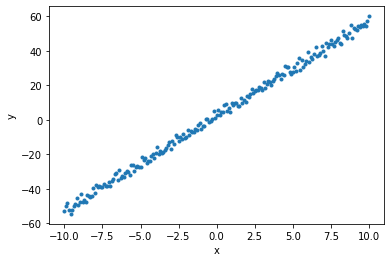

In [51]:
##Generacion de datos
x = tf.linspace(-10.0, 10.0, 200+1)
inter_true=tf.constant(2.3)
pendi_true=tf.constant(5.5)
noise = tf.random.normal(
    (201,), mean=0.0, stddev=1.9, dtype=tf.dtypes.float32)
y = pendi_true*x+inter_true+noise
plt.scatter(x,y,marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend

In [52]:
## Datos generados en Dataframe
dict_={'x':x,'y':y}
df =pd.DataFrame(dict_)
df.head()

,x,y
0,-10.0,-52.845455
1,-9.9,-50.041302
2,-9.8,-48.350018
3,-9.7,-52.424183
4,-9.6,-54.462551


In [63]:
## Uso de Gradient Descent para realizar la regresion lineal #https://en.wikipedia.org/wiki/Gradient_descent

def gradient_descent(df, init_pendiente, init_intercept, n_pasos=80, learning_rate=1e-3):
    
    #datos
    x, y = df['x'].values, df['y'].values
    
    #definicion de variables pendiente m y punto de corte b
    tf_pend = tf.Variable(init_pendiente, dtype='float32', name='m') 
    tf_inter = tf.Variable(init_intercept, dtype='float32', name='b') 
    loss_hist = []
    
    #iteraciones
    for _ in range(n_pasos):
        
        # funcion with tf.GradientTape() 
        with tf.GradientTape(watch_accessed_variables=False) as tape:

            tape.watch( ##Complete codigo)

           
            predicc = tf_pend * x + tf_inter
            errors = predicc - y
            loss = tf.reduce_mean(errors**2)

        # evaluacion del gradiente dloss/dm (dl_dm) y dloss/db (dl_db)
        
        dl_dm,dl_db = tape.gradient(##Complete codigo)
        
        # gradient_descent algoritmo
        tf_pend = tf_pend - learning_rate * dl_dm
        tf_inter = tf_inter - learning_rate * dl_db 
            
        # generacion lista de valores de la funcion loss en cada iteracion
        loss_hist.append(loss.numpy())
        
        
    return tf_pend.numpy(), tf_inter.numpy(), loss_hist

In [64]:
m_pred, b_pred, loss_func = gradient_descent(df, 2., 2.)
print('Valor de la pendiente predicha: {}. Valor de la pendiente real: {}. \n'.format(m_pred,pendi_true.numpy()))
print('Valor del intercepto predicho: {}. Valor del intercepto real: {}. \n'.format(b_pred,inter_true.numpy()))

Valor de la pendiente predicha: 5.490266799926758. Valor de la pendiente real: 5.5. 

Valor del intercepto predicho: 2.07192325592041. Valor del intercepto real: 2.299999952316284. 



<function matplotlib.pyplot.legend(*args, **kwargs)>

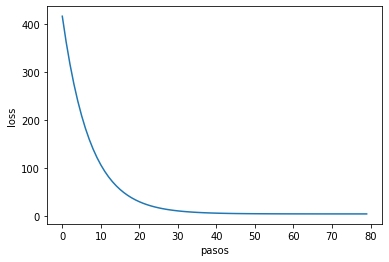

In [65]:
## Grafica del comportamiento de la funcion loss en cada iteracion
plt.plot(loss_func)
plt.xlabel('pasos')
plt.ylabel('loss')
plt.legend

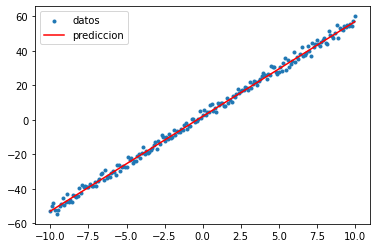

In [66]:
# Prediccion de la regresion!
plt.scatter(x,y,marker='.', label='datos')
plt.plot(x,x*m_pred+b_pred,color='red', label='prediccion')
plt.legend()

##### Funciona!!

### Parte 3. Datos estructurados.
Escoja una base de datos estructurado de: https://www.tensorflow.org/datasets/catalog/overview#structured y genere un pipeline con un batch de 100, dividido en entrenamiento y prueba, y con propiedades de shuffle, cache, prefetch y  normalize los datos numericos. 